## Car price Prediction

#### About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner
For used motorcycle datasets please go to https://www.kaggle.com/nehalbirla/motorcycle-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.shape

(301, 9)

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [11]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
df.replace({'Transmission':{'Manual':0,'Automatic':1},'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
            'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [15]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [19]:
pred = lin_reg.predict(x_train)

In [20]:
score = metrics.r2_score(y_train, pred)
score

0.8806173715719128

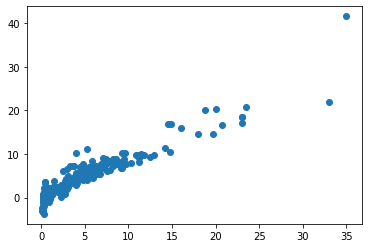

In [21]:
plt.scatter(y_train, pred)

In [22]:
test_pred = lin_reg.predict(x_test)

In [23]:
test_score = metrics.r2_score(y_test, test_pred)
test_score

0.8311069476244379

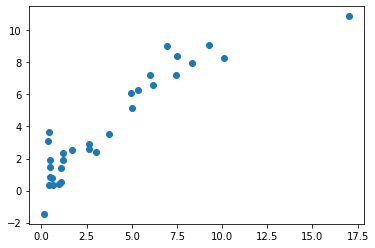

In [24]:
plt.scatter(y_test, test_pred)

In [25]:
lass_reg = Lasso()

In [26]:
lass_reg.fit(x_train,y_train)

Lasso()

In [27]:
lass_pred = lass_reg.predict(x_train)

In [28]:
lass_score = metrics.r2_score(y_train, lass_pred)
lass_score

0.8436909482009374

In [29]:
lass_pred_test = lass_reg.predict(x_test)

In [30]:
test_score_lasso = metrics.r2_score(y_test, lass_pred_test)
test_score_lasso

0.839226320049873